
# 1. **Exploratory Data Analysis** <a class="anchor" id="1"></a>


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

---
## 1.1 **Data Dictionary** <a class="anchor" id="1.1"></a>

1. age: age in years
2. sex: sex 
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) 
    * 1 = true; 
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina 
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 
    * 0 = `error (in the original dataset 0 maps to NaN's)`
    * 1 = fixed defect
    * 2 = normal 
    * 3 = reversable defect 
14. target (the lable): 
    * 0 = no disease, 
    * 1 = disease
---    
**Note on the target label**:

`Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing`
    
**Notes from the discussion forum of the dataset**:

* data #93, 159, 164, 165 and 252 have `ca=4` which is incorrect. In the original Cleveland dataset they are NaNs.
* data #49 and 282 have `thal = 0`, also incorrect. They are also NaNs in the original dataset.

**Action**:  Drop the faulty data! (7 data entry will be dropped)

---

## 1.2 **Data pre-processing** <a class="anchor" id="1.2"></a>
### 1.2.1 Drop faulty data
Based on our investigation we did above, we will drop 7 rows.

In [5]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


### 1.2.2 Rename columns for the sake of clarity
**Note**: I borrowed [Rob Harrand's](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model) idea of re-naming the columns.

In [6]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [7]:
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'typical angina'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'asymptomatic'

data.loc[data['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
data.loc[data['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

data.loc[data['resting_electrocardiogram'] == 0, 'resting_electrocardiogram'] = 'normal'
data.loc[data['resting_electrocardiogram'] == 1, 'resting_electrocardiogram'] = 'ST-T wave abnormality'
data.loc[data['resting_electrocardiogram'] == 2, 'resting_electrocardiogram'] = 'left ventricular hypertrophy'

data.loc[data['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'
data.loc[data['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data['st_slope'] == 0, 'st_slope'] = 'upsloping'
data.loc[data['st_slope'] == 1, 'st_slope'] = 'flat'
data.loc[data['st_slope'] == 2, 'st_slope'] = 'downsloping'

data.loc[data['thalassemia'] == 1, 'thalassemia'] = 'fixed defect'
data.loc[data['thalassemia'] == 2, 'thalassemia'] = 'normal'
data.loc[data['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'


In [8]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [9]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### 1.2.3 Grouping Features (by data type)
* As we have seen above there are three datatypes i.e **object**, **int** and **floats**. Let's group them according to type.


In [10]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 1.3 **Exploring Features/Target** <a class="anchor" id="1.3"></a>


### 1.3.1 Target distribution
 
We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.


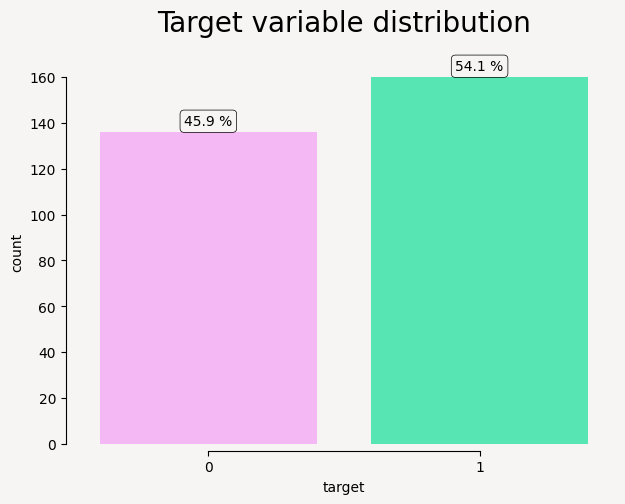

In [11]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [12]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### Importrance of Features

---
# 2. **Predictions** <a class="anchor" id="2"></a>
---
**Note** : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms. 

## 2.1 **Scikit Learn Classifiers** <a class="anchor" id="2.1"></a>

This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as `Logistic Regression`, `Nearest Neighbors`, `Support Vectors`, `Nu SVC`, `Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, `Naive Bayes`, `Linear Discriminant Analysis`, `Quadratic Discriminant Analysis` and `Neural Net`. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix,  classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import LabelEncoder


In [14]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers, X_train, y_train, X_val, y_val):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)
        precision = precision_score(y_val, pred)
        recall = recall_score(y_val, pred)
        f1 = f1_score(y_val, pred)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)
    

    return(np.round(data_table.reset_index(drop=True), 2))



    
    

                

## Looking at importance of features

                      Feature  Importance
2             chest_pain_type    0.127263
12                thalassemia    0.123058
11          num_major_vessels    0.120161
9               st_depression    0.112507
7     max_heart_rate_achieved    0.108978
0                         age    0.096766
4                 cholesterol    0.075065
3      resting_blood_pressure    0.072386
8     exercise_induced_angina    0.049805
10                   st_slope    0.049116
1                         sex    0.034168
6   resting_electrocardiogram    0.018044
5         fasting_blood_sugar    0.012683


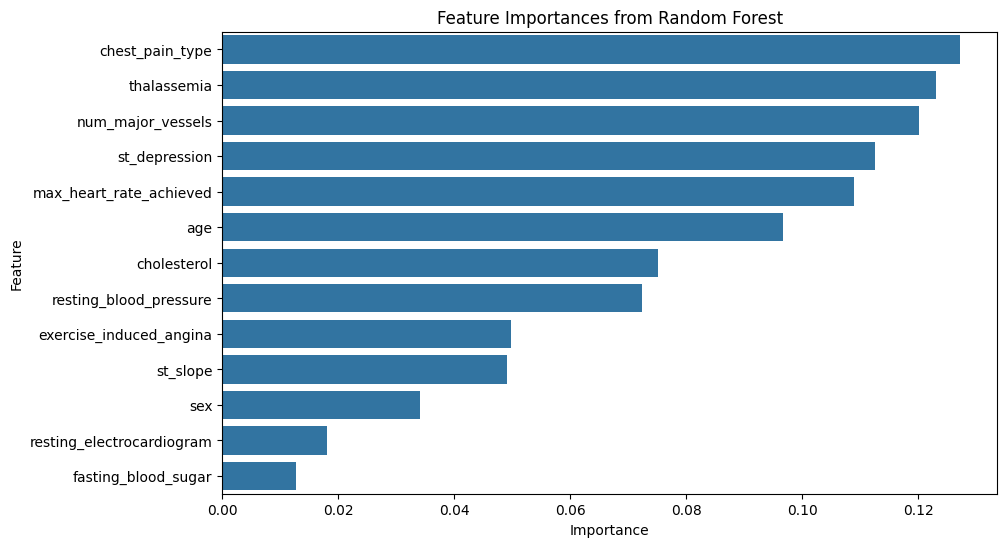

In [ ]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)

from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined as your features and target
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

print(feat_importances)

# Optional: Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Feature Importances from Random Forest')
plt.show()



In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use all features for RFE
X_all = data.drop('target', axis=1)
y = data['target']

# Create the model and RFE selector
estimator = RandomForestClassifier(random_state=seed)
selector = RFE(estimator, n_features_to_select=8)
selector = selector.fit(X_all, y)

# Get the selected feature names
selected_features = X_all.columns[selector.support_].tolist()
print("RFE selected features:", selected_features)

# Use only selected features for training/validation
X_selected = data[selected_features]
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=test_size, random_state=seed)

RFE selected features: ['age', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'thalassemia']


In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

X_all = data.drop('target', axis=1)
y = data['target']

# Select top 8 features
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_all, y)

selected_features = X_all.columns[selector.get_support()].tolist()
print("SelectKBest selected features:", selected_features)

# Use only selected features for training/validation
X_selected = data[selected_features]
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=test_size, random_state=seed)

SelectKBest selected features: ['age', 'sex', 'chest_pain_type', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


In [ ]:
# Top 8 features list based on importance
top_features = [
    'chest_pain_type',
    'thalassemia',
    'num_major_vessels',
    'st_depression',
    'max_heart_rate_achieved',
    'age',
    'cholesterol',
    'resting_blood_pressure' ,
]

X = data[top_features]
y = data['target']

# Split as before
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)

In [51]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((222, 10), (74, 10), (222,), (74,))

In [52]:
# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),

]

In [53]:
score_summary(names, classifiers,X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,86.490000,0.920000,0.910000,0.820000,0.860000
5,AdaBoost,85.140000,0.930000,0.890000,0.820000,0.850000
7,Naive Bayes,85.140000,0.920000,0.860000,0.830000,0.850000
4,Random Forest,81.080000,0.900000,0.830000,0.780000,0.810000
3,Decision Tree,79.730000,0.800000,0.770000,0.790000,0.780000
6,Gradient Boosting,78.380000,0.890000,0.800000,0.760000,0.780000
2,Support Vectors,63.510000,0.810000,0.860000,0.580000,0.690000
1,Nearest Neighbors,55.410000,0.600000,0.310000,0.550000,0.400000


In [42]:
from sklearn.model_selection import RandomizedSearchCV


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

random_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % random_search.best_params_)

Best Hyperparameters: {'C': np.float64(0.2835648865872159), 'penalty': 'l2', 'solver': 'liblinear'}


In [43]:
params = random_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



In [45]:
# All features
# X_all = data.drop('target', axis=1)
# y = data['target']
# X_train_all, X_val_all, y_train, y_val = train_test_split(X_all, y, test_size=test_size, random_state=seed)
# model = RandomForestClassifier(random_state=seed)
# model.fit(X_train_all, y_train)
# print("All features accuracy:", model.score(X_val_all, y_val))

# # Top 8 features
# X_top = data[top_features]
# X_train_top, X_val_top, _, _ = train_test_split(X_top, y, test_size=test_size, random_state=seed)
# model.fit(X_train_top, y_train)
# print("Top 8 features accuracy:", model.score(X_val_top, y_val))

### End Of Notebook